# <div> <center> <b> NN Arabic Handwriting Recognition </b> </center> </div>

## <b> Credentials: </b> (E-JUST Submission)
- Name: Yousef Ibrahim Gomaa Mahmoud
- ID: 320210207
- Group: 1
- Section: AID 3

## <b> Notebook Workflow: </b>
- Environment Setup
- Data Pre-processing
- Data Visualization
- Model Definition
- Training the Model
- Prediction

## <b> Introduction: </b>
<p> In this notebook, a model is to be trained to <b> recognize/classify arabic letters </b> using a convolutional neural network (CNN) through Keras, a TensorFlow tool. </p>

## <b> Dataset: </b>
https://www.kaggle.com/competitions/arabic-letters-classification

## Environment Setup:
### Importing Packages

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### GPU Checkup:
Kaggle provides 2 GPUs which are relied upon heavily during the training phase.

In [2]:
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))

: /physical_device:CPU:0
: /physical_device:GPU:0
: /physical_device:GPU:1


### Loading the Dataset(s):

In [3]:
datasets = ['/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train',\
            '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test']
NUM_CLASS = 65
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 512
SEED = 43
LABEL_NAMES = [i for i in range(NUM_CLASS)]

- There are 65 classes to classify into (0-64)
- Images must be resized to a consistent size in order to train properly.

In [4]:
# str = "user001_heh_middle_042.png"
# str[8:18]

## Data Pre-processing:
Splitting training data into 'Training' and 'Validation' for the model to train on.

In [5]:
train_images = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    color_mode="grayscale",
    label_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)


Found 42559 files belonging to 65 classes.
Using 34048 files for training.


In [6]:
train_validation = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    color_mode="grayscale",
    label_mode="categorical",
    subset="validation",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 42559 files belonging to 65 classes.
Using 8511 files for validation.


## Data Visualization:

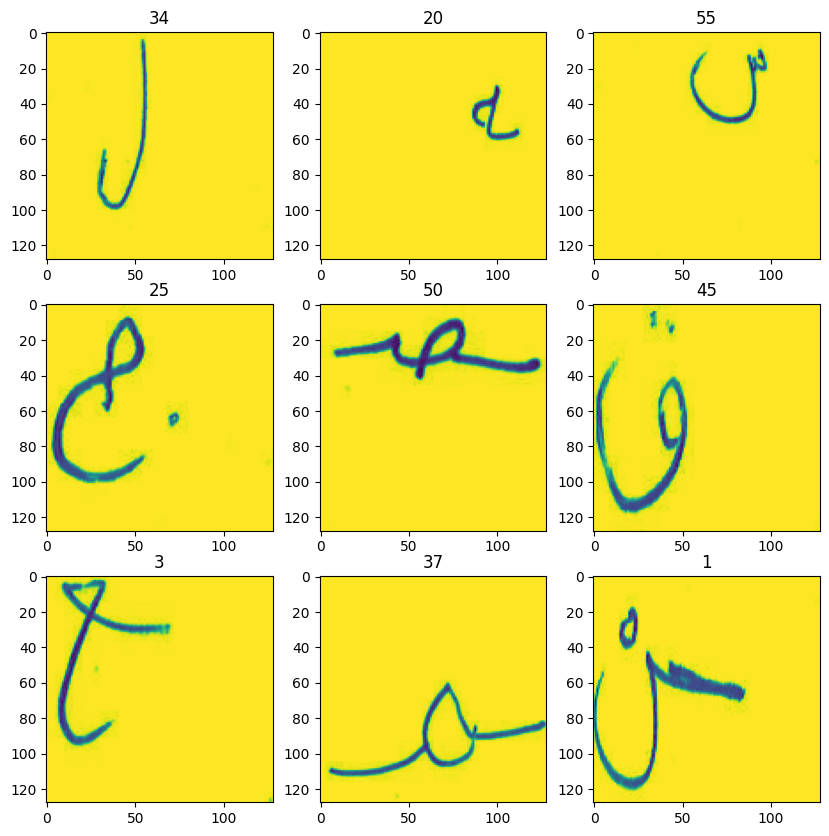

In [7]:
class_names = train_images.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1): # Takes a batch and shows the first 9 images
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.where(np.array(labels[i])==1)[0][0]])

In [8]:
for images, labels in train_images:
    print(images.shape)
    print(labels.shape)
    break

(512, 128, 128, 1)
(512, 65)


- (Batch Size, Width, Height, 1 Image Tensor Channel (Greyscale))
- (Batch Size, Number of Classes)

## Model Definition:

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(64, (4, 4), activation = 'relu', input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu',\
#                           kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#     tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASS, activation=tf.nn.softmax)
])

### Model Summary:

In [10]:
model.build(input_shape=(None, IMAGE_SIZE[0], IMAGE_SIZE[1], 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 125, 125, 64)      1088      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 115200)            0

### Model Optimization:

In [11]:
model.compile(optimizer = Adam(lr=0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])

## Training the Model:

In [12]:
model.fit(train_images, validation_data=train_validation, epochs=25)

Epoch 1/25
67/67 [==============================] - 74s 879ms/step - loss: 4.0423 - accuracy: 0.0741 - val_loss: 3.6306 - val_accuracy: 0.1398
Epoch 2/25
67/67 [==============================] - 26s 359ms/step - loss: 3.3570 - accuracy: 0.1893 - val_loss: 3.3071 - val_accuracy: 0.1934
Epoch 3/25
67/67 [==============================] - 26s 365ms/step - loss: 2.7587 - accuracy: 0.3105 - val_loss: 2.8879 - val_accuracy: 0.2728
Epoch 4/25
67/67 [==============================] - 26s 362ms/step - loss: 2.3426 - accuracy: 0.4005 - val_loss: 2.8190 - val_accuracy: 0.2955
Epoch 5/25
67/67 [==============================] - 26s 361ms/step - loss: 2.0189 - accuracy: 0.4714 - val_loss: 2.8075 - val_accuracy: 0.3124
Epoch 6/25
67/67 [==============================] - 26s 361ms/step - loss: 1.7667 - accuracy: 0.5340 - val_loss: 2.8308 - val_accuracy: 0.3184
Epoch 7/25
67/67 [==============================] - 26s 366ms/step - loss: 1.5619 - accuracy: 0.5854 - val_loss: 2.9071 - val_accuracy: 0.3243

Re-training:

In [13]:
model.fit(train_images, validation_data=train_validation, epochs=25)

Epoch 1/25
67/67 [==============================] - 27s 374ms/step - loss: 0.0196 - accuracy: 0.9996 - val_loss: 6.4180 - val_accuracy: 0.3392
Epoch 2/25
67/67 [==============================] - 27s 367ms/step - loss: 0.0166 - accuracy: 0.9997 - val_loss: 6.5295 - val_accuracy: 0.3367
Epoch 3/25
67/67 [==============================] - 27s 370ms/step - loss: 0.0143 - accuracy: 0.9998 - val_loss: 6.6578 - val_accuracy: 0.3360
Epoch 4/25
67/67 [==============================] - 26s 366ms/step - loss: 0.0122 - accuracy: 0.9999 - val_loss: 6.7660 - val_accuracy: 0.3360
Epoch 5/25
67/67 [==============================] - 27s 374ms/step - loss: 0.0108 - accuracy: 0.9999 - val_loss: 6.8560 - val_accuracy: 0.3345
Epoch 6/25
67/67 [==============================] - 27s 377ms/step - loss: 0.0095 - accuracy: 0.9999 - val_loss: 6.9406 - val_accuracy: 0.3358
Epoch 7/25
67/67 [==============================] - 27s 374ms/step - loss: 0.0085 - accuracy: 0.9999 - val_loss: 7.0365 - val_accuracy: 0.3332

### Saving the Model:

Keras format:

In [14]:
model.save('nn-arabic-handwriting-320210207.keras')

### Loading the Model:

In [15]:
# model = tf.keras.models.load_model('nn-arabic-handwriting-320210207.keras')

## Prediction:

Loading the 'Test' dataset:

In [16]:
test_images = tf.keras.utils.image_dataset_from_directory(
        datasets[1],
        labels=None,
        color_mode="grayscale",
        label_mode="categorical",
        shuffle=False,
        seed=SEED,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE)

Found 10640 files belonging to 1 classes.


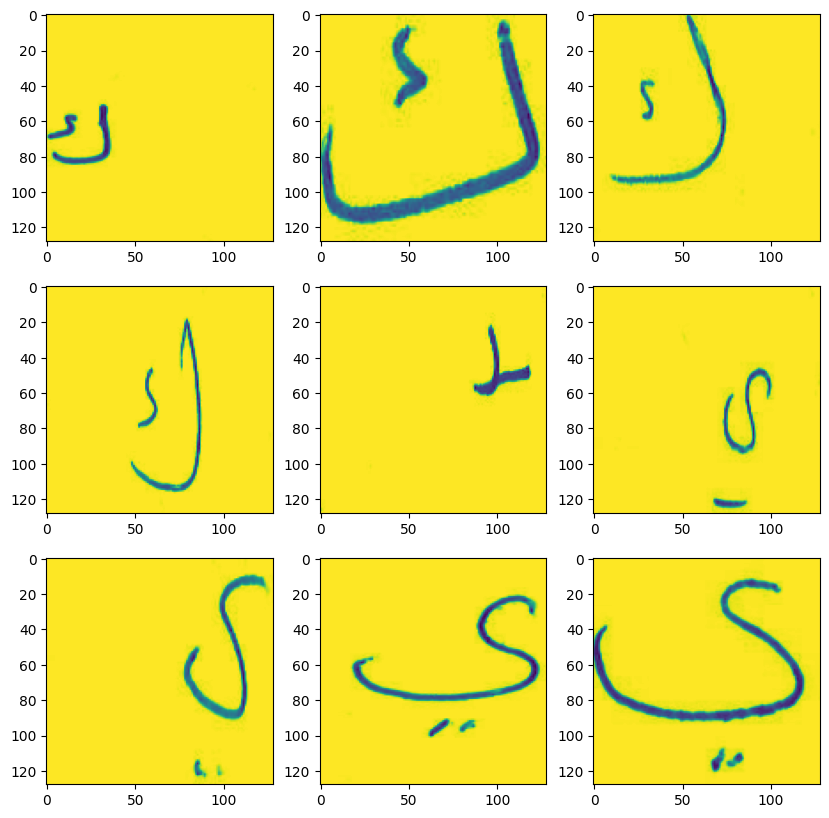

In [17]:
plt.figure(figsize=(10, 10))
for images in test_images.take(1): # Takes a batch and shows the first 9 images
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

In [18]:
for images in test_images:
    print(images.shape)
    break

(512, 128, 128, 1)


In [19]:
predictions = model.predict(test_images)

21/21 [==============================] - 12s 591ms/step


## Making 'predictions.csv':

In [20]:
print(predictions)

[[7.9809487e-19 1.0119939e-09 1.3591270e-09 ... 2.5417867e-12
  4.7934200e-15 4.3959399e-22]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.1793908e-17 1.9144808e-15 5.6758374e-25 ... 2.8751786e-25
  2.3567262e-33 8.6241273e-34]
 ...
 [4.7416696e-11 1.5079550e-03 4.3127759e-09 ... 2.3452122e-25
  1.4921790e-28 5.6915024e-22]
 [3.4957539e-16 7.5055112e-07 2.1441423e-12 ... 1.0578571e-14
  1.0753895e-36 2.3589009e-25]
 [0.0000000e+00 8.6942064e-22 1.2115142e-27 ... 3.1424656e-34
  0.0000000e+00 0.0000000e+00]]


In [21]:
df_predictions = pd.DataFrame(columns=['ID','Label'], dtype=(np.int32,np.int32))
df_predictions.dtypes
img_list = os.listdir('/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test')

predictions_mod = np.argmax(predictions, axis=1)

for idx, image in enumerate(img_list):
    df2 = pd.DataFrame([[int(image.split(".")[0]), int(predictions_mod[idx])]], columns=['ID','Label'])
    df_predictions = pd.concat([df_predictions, df2])

In [22]:
print(predictions_mod)

[28 22  6 ... 23 36 61]


In [23]:
df_predictions.head()

,ID,Label
0,9273,28
0,9292,22
0,4353,6
0,7968,22
0,6490,6


In [24]:
df_predictions.sort_values(by='ID', inplace=True)

In [25]:
df_predictions.reset_index(drop=True)

,ID,Label
0,0,58
1,1,29
2,2,2
3,3,45
4,4,4
...,...,...
10635,10635,16
10636,10636,35
10637,10637,6
10638,10638,29


In [26]:
df_predictions.sample()

,ID,Label
0,1285,23


In [27]:
df_predictions.to_csv('predictions.csv', index=False, header=True) 